# 主成分分析 Princiapal Component Analysis
## 一、基本原理

一个非监督的机器学习算法

主要用于数据的降维通过降维，可以发现更便于人类理解的特征

其他应用：可视化；去噪

![IMAGE](https://farm2.staticflickr.com/1758/41820738655_38b54eb5b0_o.png)

如何把二维降为一维？
![IMAGE](https://farm2.staticflickr.com/1737/40910315090_5c5e748552_o.png)

![IMAGE](https://farm2.staticflickr.com/1759/41820802405_953c9bb1a5_o.png)


### 具体步骤

第一步：将样本的均值归零 demean。这样有利于方差的化简
![IMAGE](https://farm2.staticflickr.com/1729/28847011368_ed5be2ef23_o.png)

![IMAGE](https://farm2.staticflickr.com/1743/42720473601_cc312e7a25_o.png)

这里的 X 其实是多维度的向量，这里是一个二维向量。所以我们需要写的更加标准：
![IMAGE](https://farm2.staticflickr.com/1744/40910370500_6a1c6f0727_o.png)

```python
# 求向量的模
def direction(w):
    return w / np.linalg.norm(w)
```
### 向量模的平方最大值
求xi 在新的轴上的映射，其实就是向量点乘的定义
![IMAGE](https://farm2.staticflickr.com/1742/41820932115_a6eb73cab8_o.png)

![IMAGE](https://farm2.staticflickr.com/1745/42002800994_74bc22c1a0_o.png)

### 与线性回归的区别
#### 线性回归
![IMAGE](https://farm2.staticflickr.com/1750/40910475680_24bd526a9c_o.png)
#### 主成分分析
![IMAGE](https://farm2.staticflickr.com/1722/41820976405_6b4d05c876_o.png)

## 二、梯度上升分析
因为只有 x 的信息，没有 y，所以他是一种非监督学习
![IMAGE](https://farm2.staticflickr.com/1733/41821193115_ea958ba825_o.png)
括号里面可以用向量 dot 表示
![IMAGE](https://farm2.staticflickr.com/1734/40910680710_463f6e16f2_o.png)
进一步向量化
![IMAGE](https://farm2.staticflickr.com/1748/42003125714_986e63577f_o.png)
最终结果
![IMAGE](https://farm2.staticflickr.com/1743/40910743850_3eb107eb94_o.png)

## 三、使用梯度上升法实现PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.empty((100, 2))
# 特征1
X[:,0] = np.random.uniform(0., 100., size=100)

# 特征2：和特征1 有几个简单的关系 
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

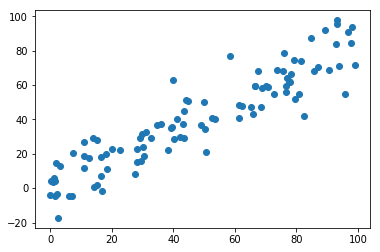

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean
x 要减去**各自特征对应的均值**，所以要求每一列的均值 axis = 0

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

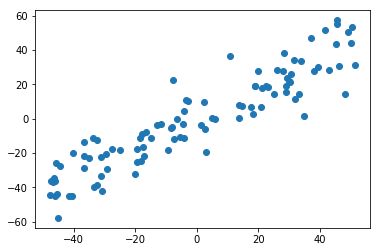

In [7]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

此时分布相同，但是坐标轴变了

In [8]:
np.mean(X_demean[:,0])

-4.1922021409845909e-15

In [9]:
np.mean(X_demean[:,1])

1.6058265828178263e-14

### 梯度上升法
![IMAGE](https://farm2.staticflickr.com/1748/42003251474_3c090a26b0_o.png)

In [10]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

![IMAGE](https://farm2.staticflickr.com/1757/27852521687_401bbdbf21_o.png)

In [11]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [12]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

# 求向量的模
def direction(w):
    return w / np.linalg.norm(w)

# 真正的梯度上升
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient # ❤️ 注意这个加号
        # ❤️ 如果不进行单位处理，会导致 w 很大，也就是梯度走的步长很大
        # 从而我们会减少学习效率，最终导致学习效率很低
        
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

初始化的时候，x 不能为0。因为这样梯度一直为0，不发生变化。
```java
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)
```
> 因为0是是一个极小值，但我们需要一个极大值。

In [13]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
# W 初始化成 x 的列数
initial_w

array([ 0.69898742,  0.3629401 ])

In [14]:
eta = 0.001


不能使用StandardScaler标准化数据：因为我们希望方差最大，但是标准化之后，方差固定是1，就没有最大值的意义了。

其实我们在某种程度上已经做了标准化处理：**我们处理了均值，但没有处理方差**

In [15]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([ 0.74789707,  0.66381471])

In [16]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([ 0.74789707,  0.66381471])

In [17]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

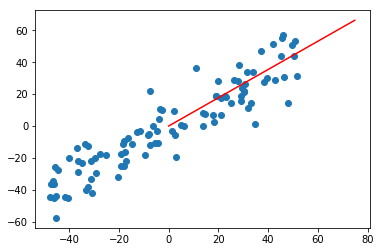

In [24]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*100], [0, w[1]*100], color='r')
## 单位向量很少，我们给他放大一下
plt.show()

### 使用极端数据集测试

In [19]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3. # ❤️ 没有添加噪音

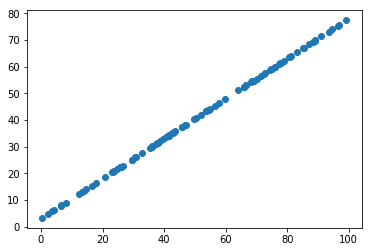

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
X2_demean = demean(X2)

In [22]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

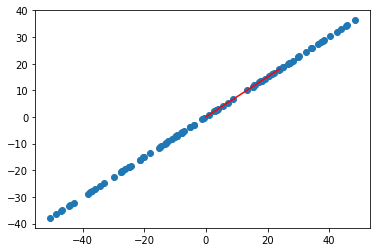

In [23]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）